# Проект: "Принятие решений в бизнесе. Приоритизация маркетинговых гипотез и анализ А/B-теста"

**В проекте выполнена приоритизация девяти маркетинговых гипотез, направленных на увеличение выручки интернет-магазина, с применением фреймворков ICE (impact, confidence, efforts) и RICE (reach, impact, confidence, efforst), а также проведен анализ результатов A/B-теста.**

**Данные для приоретизации представлены датасетом `hypothesis.csv`, в котором содержится следующая информация:**

`Hypothesis` — краткое описание гипотезы;

`Reach` — охват пользователей по 10-балльной шкале;

`Impact` — влияние на пользователей по 10-балльной шкале;

`Confidence` — уверенность в гипотезе по 10-балльной шкале;

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Результаты A/B-теста представлены двумя датаесетами - `orders.csv` и `visitors.csv`, в которых хранится информация о заказах и посещениях интернет-магазина пользователями групп, принимавших участие в тесте.**

**Датасет `orders.csv` содержит столбцы:**

`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue` — выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.

**Датасет `visitors.csv`:**

`date` — дата;

`group` — группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

**План выполнения проекта:**

**[Часть 1. Приоритизация гипотез](#hyp)**

1. Приоритизировать гипотезы с использованием фреймворка ICE и отсортировать гипотезы по убыванию приоритета.

2. Приоритизировать гипотезы с использованием фреймворка RICE и отсортировать гипотезы по убыванию приоритета.

3. Сопоставить результаты полученные в п.1 и 2. Объяснить причины изменения приоритизации во фреймворке RICE по сравнению c ICE.

**[Часть 2. Анализ результатов A/B-теста](#ab)**

**[1. Построить графики по "сырым" данным и сделать по ним предположения и выводы:](#plots)**

    1.1. Для кумулятивной выручки по группам.
    
    1.2. Для кумулятивного среднего чека по группам.
    
    1.2. Для относительного изменения кумулятивного среднего чека группы B к группе A.
    
    1.3. Для кумулятивного среднего количества заказов на посетителя по группам.
    
    1.4. Для относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
    
**[2. Оценить границы аномального числа заказов на пользователя и аномальной стоимости заказа:](#borders)** 

    2.1. Построить точеченый график количества заказов по пользователям. Сделать выводы и предположения.
    
    2.2. Рассчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
    
    2.3. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
    
    2.4. Рассчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

**[3. Оценить статистическую значимость различий:](#stats)**

    3.1. В среднем количестве заказов на посетителя между группами по «сырым» данным.
    
    3.2. В среднем количестве заказов на посетителя между группами по «очищенным» данным.
    
    3.3. В среднем чеке заказа между группами по «сырым» данным.
    
    3.4. В среднем чеке заказа между группами по «очищенным» данным.
    
    
**[4. Принять решение по результатам теста и объяснить его.](#conclusions)**

## Приоритизация гипотез
<a id='hyp'></a>

**Импортируем необходимы библотеки и методы:**

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker

import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

**Загружаем данные из `csv` файлов в датафреймы и сразу переводим столбцы с датой в формат `datetime`:**

In [2]:
hyp = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv', parse_dates=['date'])
visitors = pd.read_csv('visitors.csv', parse_dates=['date'])

**Выведем датафрейм `hyp`, содержащий информацию о гипотезах:**

In [3]:
pd.options.display.max_colwidth = 200
hyp.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Для удобства работы приведем названия столбцов с lower case:**

In [4]:
hyp.columns = [x.lower() for x in hyp.columns]
hyp.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Приоритизация гипотез во фреймворке ICE
**Рассчитаем ICE Score для каждой гипотезы и добавим его в новый столбец `ice`. Затем отсортируем датафрейм по убыванию этого столбца:**

In [5]:
hyp['ice'] = round(hyp['impact'] * hyp['confidence'] / hyp['efforts'], 2)
hyp = hyp.sort_values(by='ice', ascending=False)
hyp

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


**Согласно фреймворку ICE, приоритетными являются следующие гипотезы:**
1. Запустить акцию, дающую скидку на товар в день рождения (16.2 балла)
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (13.3 балла)
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (11.2 балла)

### Приоритизация гипотез во фреймворке RICE
**Чтобы при приоритизации гипотез учесть параметр Reach, рассчитаем RICE Score. Добавим столбец `rice` в датафрейм `hyp` и отсортируем его по этому столбцу:**

In [6]:
hyp['rice'] = hyp['ice'] * hyp['reach']
hyp = hyp.sort_values(by='rice', ascending=False)
hyp

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,39.99
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8.96
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,3.99
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


**Согласно фреймворку RICE следует отдать предпочтение следующим гипотезам:**

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (112 баллов)
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (56 баллов)

**Еще две гипотезы набрали одинаковое количество баллов RICE (40) и находятся на третьей позиции по приоритету:**

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

### Сопоставление результатов приоритизации во фреймворках ICE и RICE

**1. Гипотеза о запуске акции, дающей скидку на день рождения, которая имела наибольший приоритет во фреймворке ICE, оказалась лишь пятой по приоритету во фреймворке RICE, что связано с самым низким показателем Reach (1) среди всех гипотез**

**2. Гипотеза о добавлении формы подписки, которая была на третьей позиции во фреймворке ICE, "переехала" на первое место во фреймворке RICE за счет наивысшего показателя Reach (10)**

**3. Гипотеза о добавлении двух новых каналов привлечения трафика была на втором месте во фреймворке ICE и осталась в тройке лидеров на третьей месте при использовании фреймворка RICE за счет высоких показателей Impact (10) и Confidence(8), не смотря на сравнительно невысокий показатель Reach (3)**

**4. Гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" поднялась с пятой позиции во фреймворке ICE на второе место во фреймворке RICE за счет высокого показателя Reach (8)**

**5. Гипотеза "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" поднялась в рейтинге RICE по сравнению с ICE на 3-ю позицию с 4-ой благодаря сравнительно высокому значению параметра Reach (5)**

**Таким образом, параметр Reach оказывает существенное влияние на приоритизацию и, если по другим параметрам гипотезы отличаются незначительно, может позволить выбрать те из них, которые охватывают наиболее высокий процент пользователей продукта или услуги**

## Анализ результатов A/B-теста
<a id='ab'></a>
### Визуализация результатов A/B-теста по "сырым данным"
**В данном разделе будет выполнено построение и анализ графиков изменения ряда метрик по всем данным, включая те, которые являются статистически аномальными (данные покупателей, оформивших заказы с очень высокой стоимостью и тех, кто заказывал очень часто). Прежде чем приступить к визуализации, посмотрим на имеющиеся данные и подготовим их к дальнейшей работе**

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Проверим на наличие явных дубликатов:**

In [9]:
orders.duplicated().sum()

0

In [10]:
visitors.duplicated().sum()

0

**Проверим данные о группах в каждом датафрейме:**

In [11]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [12]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

**Просмотрим информацию:**

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Посмотрим, соответствуют ли друг-другу минимальная и максимальная даты наблюдений в обоих датафреймах - `visitors` и `ordes`:**

In [15]:
print(orders['date'].min())
print(visitors['date'].min())
print()
print(orders['date'].max())
print(visitors['date'].max())

2019-08-01 00:00:00
2019-08-01 00:00:00

2019-08-31 00:00:00
2019-08-31 00:00:00


**Даты соответствуют и уже приведены к формату, который необходим для визуализации результатов. Диапазон дат проведения A/B теста с 1 августа 2019 по 31 августа 2019 года**

**Посмотрим на размеры выборок по общему числу посетителей в каждой из групп. Они не должны отличаться более чем на 1%, чтобы результатам можно было доверять:**

In [16]:
vis_num_a = visitors.query('group == "A"')['visitors'].sum()
vis_num_a

18736

In [17]:
vis_num_b = visitors.query('group == "B"')['visitors'].sum()
vis_num_b

18916

In [18]:
vis_num_a/vis_num_b-1

-0.009515753859166809

**Различия размеров выборок менее 1%**

**Создадим датафрейм `date_group` в котором соберем все уникальные комбинации групп А/B-теста и дат, в которые проходил тест:**

In [19]:
date_group = orders[['date', 'group']].drop_duplicates().reset_index(drop=True).sort_values(by=['date','group'])
date_group

,date,group
4,2019-08-01,A
5,2019-08-01,B
12,2019-08-02,A
11,2019-08-02,B
17,2019-08-03,A
...,...,...
30,2019-08-29,B
45,2019-08-30,A
40,2019-08-30,B
53,2019-08-31,A


#### Кумулятивная выручка по группам
<a id='plots'></a>

**Выполним расчет кумулятивной выручки `cumulative_revenue_a` для группы А:**

In [20]:
date_group_a = date_group.query('group == "A"') # выбираем сочетания дата-группа только для группы А
cumulative_revenue_a = date_group_a.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] 
                                          .agg({'date':'max', 'revenue':'sum'}), axis=1).reset_index(drop=True)
cumulative_revenue_a.columns=['date','cumulative_revenue'] # переименовываем столбцы
cumulative_revenue_a.head()

,date,cumulative_revenue
0,2019-08-01,148579
1,2019-08-02,242401
2,2019-08-03,354874
3,2019-08-04,425699
4,2019-08-05,549917


**Сделаем то же самое для группы B:**

In [21]:
date_group_b = date_group.query('group == "B"') # выбираем сочетания дата-группа только для группы B
cumulative_revenue_b = date_group_b.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] 
                                          .agg({'date':'max', 'revenue':'sum'}), axis=1).reset_index(drop=True)
cumulative_revenue_b.columns=['date','cumulative_revenue'] # переименовываем столбцы
cumulative_revenue_b.head()

,date,cumulative_revenue
0,2019-08-01,101217
1,2019-08-02,266748
2,2019-08-03,380996
3,2019-08-04,489567
4,2019-08-05,581995


**Построим графики кумулятивной выручки для обеих групп:**

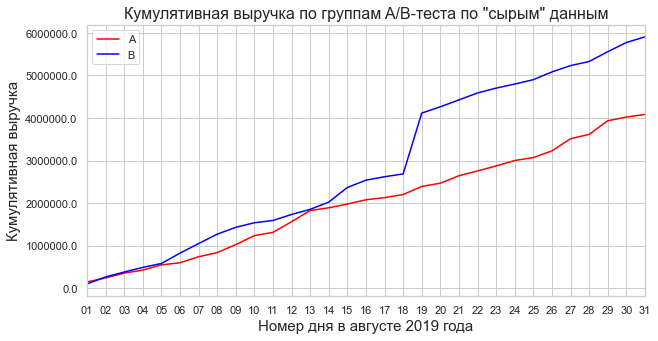

In [22]:
ax=cumulative_revenue_a.plot(x='date', y='cumulative_revenue', label='A', figsize=(10,5), grid=True, color='red')
cumulative_revenue_b.plot(x='date', y='cumulative_revenue', label='B', figsize=(10,5), grid=True, color='blue', ax=ax)
plt.xlabel('Номер дня в августе 2019 года', fontsize=15)
plt.ylabel('Кумулятивная выручка', fontsize=15)
plt.title('Кумулятивная выручка по группам A/B-теста по "сырым" данным', fontsize=16)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.show()

**В обеих группах теста по "сырым" данным кумулятивная выручка растет день ото дня, что говорит о наличии продаж для каждой группы. В группе А этот рост равномерный, а в группе B наблюдается резкий скачок кумулятивной выручки 19 августа, что может быть связано с аномально высокой стоимостью одного из заказов в этой группе в данный день. По такому графику сложно понять есть ли в действительности разница в выручке между группами.**

#### Кумулятивный средний чек по группам

**Чтобы рассчитать кумулятивный средний чек по группам нужно кумулятивную выручку (определенную в предыдущем пункте) разделить на кумулятивное число заказов. Поэтому, сначала найдем кумулятивное число заказов в каждой группе теста:**

In [23]:
cumulative_orders_a = date_group_a.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] 
                                          .agg({'date':'max', 'transactionId':'count'}), axis=1).reset_index(drop=True)
cumulative_orders_a.columns=['date','cumulative_orders'] # переименовываем столбцы
cumulative_orders_a.head()

,date,cumulative_orders
0,2019-08-01,24
1,2019-08-02,44
2,2019-08-03,68
3,2019-08-04,84
4,2019-08-05,109


In [24]:
cumulative_orders_b = date_group_b.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] 
                                          .agg({'date':'max', 'transactionId':'count'}), axis=1).reset_index(drop=True)
cumulative_orders_b.columns=['date','cumulative_orders'] # переименовываем столбцы
cumulative_orders_b.head()

,date,cumulative_orders
0,2019-08-01,21
1,2019-08-02,45
2,2019-08-03,61
3,2019-08-04,78
4,2019-08-05,101


**Теперь рассчитаем для каждой группы кумулятивный средний чек - `cumulative_avg_revenue_a` и `cumulative_avg_revenue_b`:**

In [25]:
cumulative_avg_revenue_a = cumulative_revenue_a.merge(cumulative_orders_a, on='date')
cumulative_avg_revenue_a['cum_avg_revenue'] = cumulative_avg_revenue_a['cumulative_revenue']/cumulative_avg_revenue_a['cumulative_orders']
cumulative_avg_revenue_a = cumulative_avg_revenue_a.drop(columns=['cumulative_revenue', 'cumulative_orders'])
cumulative_avg_revenue_a.head()

,date,cum_avg_revenue
0,2019-08-01,6190.791667
1,2019-08-02,5509.113636
2,2019-08-03,5218.735294
3,2019-08-04,5067.845238
4,2019-08-05,5045.110092


In [26]:
cumulative_avg_revenue_b = cumulative_revenue_b.merge(cumulative_orders_b, on='date')
cumulative_avg_revenue_b['cum_avg_revenue'] = cumulative_avg_revenue_b['cumulative_revenue']/cumulative_avg_revenue_b['cumulative_orders']
cumulative_avg_revenue_b = cumulative_avg_revenue_b.drop(columns=['cumulative_revenue', 'cumulative_orders'])
cumulative_avg_revenue_b.head()

,date,cum_avg_revenue
0,2019-08-01,4819.857143
1,2019-08-02,5927.733333
2,2019-08-03,6245.836066
3,2019-08-04,6276.500000
4,2019-08-05,5762.326733


**Построим графики изменения кумулятивного среднего чека за время наблюдения по группам:**

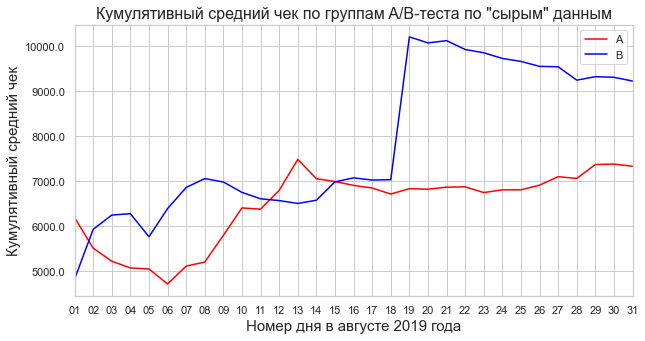

In [27]:
ax=cumulative_avg_revenue_a.plot(x='date', y='cum_avg_revenue', label='A', figsize=(10,5), grid=True, color='red')
cumulative_avg_revenue_b.plot(x='date', y='cum_avg_revenue', label='B', figsize=(10,5), grid=True, color='blue', ax=ax)
plt.xlabel('Номер дня в августе 2019 года', fontsize=15)
plt.ylabel('Кумулятивный средний чек', fontsize=15)
plt.title('Кумулятивный средний чек по группам A/B-теста по "сырым" данным', fontsize=16)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.show()

**Полученный график показывает, что в группе А примерно к середине проведения А/B-теста средний чек стабилизировался на отметке около 7000. В группе B можно было бы ожидать похожей ситуации, однако существенный скачок кумулятивной выручки (и кумулятивного среднего чека), вызванный, вероятно, одной или несколькими очень дорогими покупками, совершенными 19 августа, привел к искажению данных. В результате нельзя судить о том различаются ли средние чеки в группах, не избавившись от заказов с аномальной стоимостью.**

#### Относительное изменение кумулятивного среднего чека в группе B по сравнению с группой А

**Построим график так, чтобы относительные изменения были выражены в процентах:**

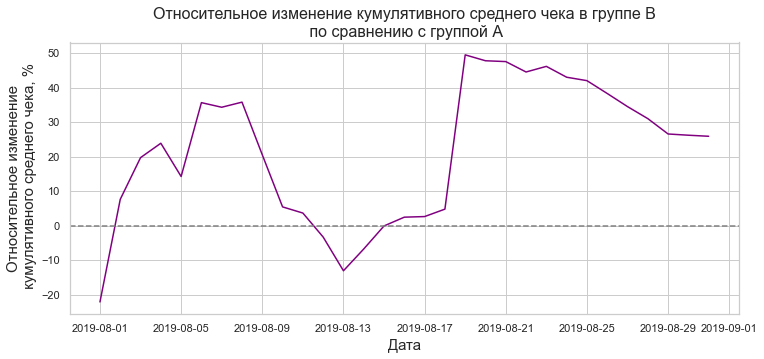

In [28]:
plt.figure(figsize=(12, 5))
plt.plot(cumulative_avg_revenue_a['date'],(cumulative_avg_revenue_b['cum_avg_revenue']/cumulative_avg_revenue_a['cum_avg_revenue']-1)*100, color='purple')
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Относительное изменение\n кумулятивного среднего чека, %', fontsize=15)
plt.title('Относительное изменение кумулятивного среднего чека в группе B\n по сравнению с группой А', fontsize=16, )
plt.axhline(y=0, color='grey', linestyle='--') 
plt.show()

**Полученный график демонстрирует высокую нестабильность как в первые две недели тестирования, так и во вторые две недели. Нестабильность относительного среднего чека в начале наблюдения может объясняться высоким вкладом данных каждого дня в общую картину, что закономерно при небольших сроках наблюдений. Однако, при отсутствии сильных выбросов (слишком больших сумм единичных заказов или других аномалиях) можно было бы ожидать уравнивания средних чеков (при отсутствии достоверных различий между группами) или стабилизации их различий возле какого-либо уровня. Однако, на нашем графике этого не происходит ни того, ни другого, что, вероятно, связано с уже упомянутой выше аномалией 19 августа, наблюдавшейя для группы B**

#### Кумулятивное среднее количество заказов на посетителя по группам

**Чтобы рассчитать кумулятивное среднее количество заказов на посетителя, нужно для каждой группы кумулятивное количество заказов в каждый день разделить на кумулятивное число посетителей в каждый день. Кумулятивное число заказов для каждой группы мы уже рассчитывали - `cumulative_orders_a` и `cumulative_orders_b`. Поэтому осталось рассчитать кумулятивное количество посетителей в группах - `cumulative_visitors_a` и `cumulative_visitors_b`:**

In [29]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [30]:
cumulative_visitors_a = date_group_a.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])] 
                                          .agg({'date':'max', 'visitors':'sum'}), axis=1).reset_index(drop=True)
cumulative_visitors_a.columns=['date','cumulative_visitors'] # переименовываем столбцы
cumulative_visitors_a.head()

,date,cumulative_visitors
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [31]:
cumulative_visitors_b = date_group_b.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])] 
                                          .agg({'date':'max', 'visitors':'sum'}), axis=1).reset_index(drop=True)
cumulative_visitors_b.columns=['date','cumulative_visitors'] # переименовываем столбцы
cumulative_visitors_b.head()

,date,cumulative_visitors
0,2019-08-01,713
1,2019-08-02,1294
2,2019-08-03,1803
3,2019-08-04,2573
4,2019-08-05,3280


**Теперь рассчитаем кумулятивное среднее число заказов на посетителя в каждой группе - `cum_avg_orders_a` и `cum_avg_orders_b`:**

In [32]:
cum_avg_orders_a = cumulative_orders_a.merge(cumulative_visitors_a, on='date')
cum_avg_orders_a['cum_avg_orders'] = cum_avg_orders_a['cumulative_orders']/cum_avg_orders_a['cumulative_visitors']
cum_avg_orders_a = cum_avg_orders_a.drop(columns=['cumulative_orders', 'cumulative_visitors'])
cum_avg_orders_a.head()

,date,cum_avg_orders
0,2019-08-01,0.033380
1,2019-08-02,0.032885
2,2019-08-03,0.036856
3,2019-08-04,0.032787
4,2019-08-05,0.032851


In [33]:
cum_avg_orders_b = cumulative_orders_b.merge(cumulative_visitors_b, on='date')
cum_avg_orders_b['cum_avg_orders'] = cum_avg_orders_b['cumulative_orders']/cum_avg_orders_b['cumulative_visitors']
cum_avg_orders_b = cum_avg_orders_b.drop(columns=['cumulative_orders', 'cumulative_visitors'])
cum_avg_orders_b.head()

,date,cum_avg_orders
0,2019-08-01,0.029453
1,2019-08-02,0.034776
2,2019-08-03,0.033833
3,2019-08-04,0.030315
4,2019-08-05,0.030793


**Построим график:**

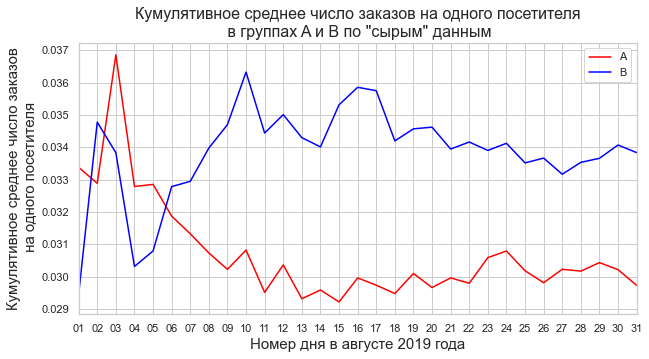

In [34]:
ax=cum_avg_orders_a.plot(x='date', y='cum_avg_orders', label='A', figsize=(10,5), grid=True, color='red')
cum_avg_orders_b.plot(x='date', y='cum_avg_orders', label='B', figsize=(10,5), grid=True, color='blue', ax=ax)
plt.xlabel('Номер дня в августе 2019 года', fontsize=15)
plt.ylabel('Кумулятивное среднее число заказов\n на одного посетителя', fontsize=15)
plt.title('Кумулятивное среднее число заказов на одного посетителя\n в группах A и B по "сырым" данным', fontsize=16)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))
plt.show()

**В начале наблюдений кумулятивное среднее количество заказов на посетителя было нестабильно в обеих группах, что можно объяснить небольшим количеством данных и относительно высоким вкладом каждого совершившего покупку клиента в данную метрику. В группе А число заказов на посетителя стабилизировалось около отметки примерно 0.030 на 10-й день наблюдений, а в группе B - на отметке примено 0.34 на 18-й день. Такой график не выглядит аномальным и указывает на то, что посетители из группы B покупают чаще, чем посетители из группы А. Статистическую значимость этого различия проверим позже.**

#### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

**Построим график так, чтобы относительные изменения были выражены в процентах:**

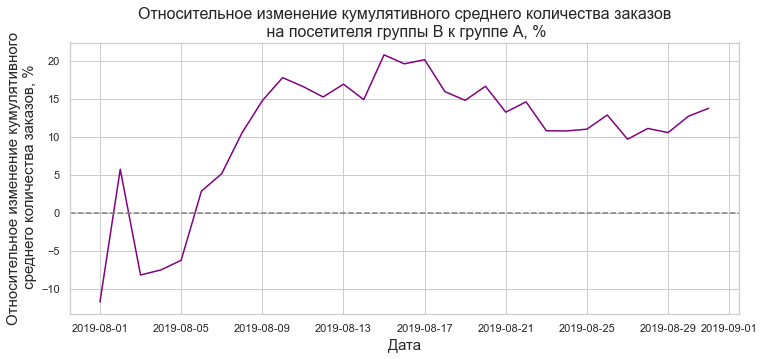

In [35]:
plt.figure(figsize=(12, 5))
plt.plot(cum_avg_orders_a['date'],(cum_avg_orders_b['cum_avg_orders']/cum_avg_orders_a['cum_avg_orders']-1)*100, color='purple')
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Относительное изменение кумулятивного\n среднего количества заказов, %', fontsize=15)
plt.title('Относительное изменение кумулятивного среднего количества заказов\n на посетителя группы B к группе А, %', fontsize=16)
plt.axhline(y=0, color='grey', linestyle='--') 
plt.show()

**Кумулятивное среднее количество заказов на посетителя в группе B превысило этот показатель в группе А на 6-й день проведения теста. Стабилизация относительных различий в среднем количестве заказов на посетителя произошла в последней трети теста на уровне 10-15% (в пользу группы B).**

### Оценка границ аномального числа заказов на пользователя и аномальной стоимости заказа
<a id='borders'></a>

#### График количества заказов по пользователям
**На основе датафрейма `orders` создадим сводную таблицу, в которой подсчитаем число заказов на каждого уникального покупателя:**

In [36]:
orders_per_customer = orders.pivot_table(index='visitorId', values='transactionId', aggfunc='count')
orders_per_customer.columns=['num_of_orders']
orders_per_customer.head()

,num_of_orders
visitorId,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1


In [37]:
orders_per_customer.describe()

,num_of_orders
count,1031.000000
mean,1.161009
std,0.724919
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,11.000000


**Построим точечный график:**

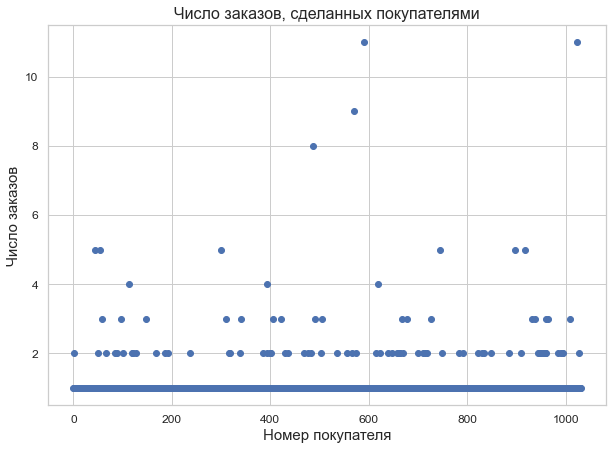

In [38]:
x_values = pd.Series(range(0,len(orders_per_customer['num_of_orders'])))
plt.figure(figsize=(10,7))
plt.scatter(x_values, orders_per_customer['num_of_orders'])
plt.title('Число заказов, сделанных покупателями', fontsize=16)
plt.xlabel('Номер покупателя', fontsize=15)
plt.ylabel('Число заказов', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Подавляющее большинство покупателей сделали один заказ, десятки - два-три заказа, и единицы - четыре и более заказов.**

#### Расчет 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [39]:
print(np.percentile(orders_per_customer['num_of_orders'], [95, 99]))

[2. 4.]


**Не более 5% процентов покупателей совершили больше двух заказов, и не более 1% заказывали больше четырех раз. Выберем в качестве границы для определения аномальных пользователей - 3 заказа, а всех пользователей с 4 и более заказами будем считать аномальными. Тогда мы отсеем от 1 до 5% покупателей.**

#### График стоимостей заказов

**Используя датафрейм `orders` построим точечный график стоимости заказов:**

In [40]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


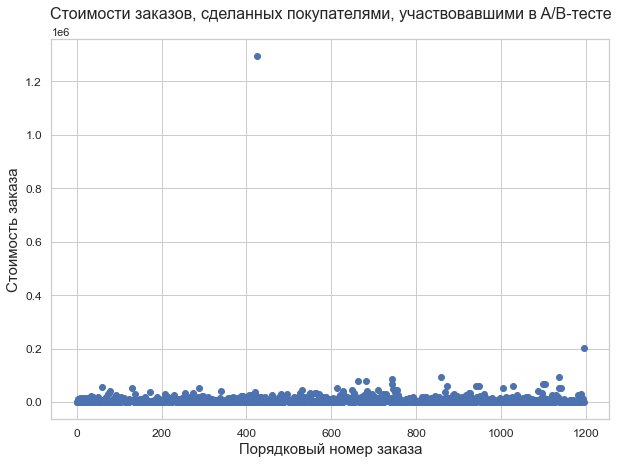

In [41]:
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize=(10,7))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимоcти заказов, сделанных покупателями, участвовавшими в A/B-тесте', fontsize=16, pad=20)
plt.xlabel('Порядковый номер заказа', fontsize=15)
plt.ylabel('Стоимость заказа', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Кто-то сделал заказ стоимостью около 1.3 млн, и еще кто-то заказал на 200 тыс. Это точно аномальные значения. Изменим масштаб оси y, чтобы более детально рассмотреть как распределеются стоимости других заказов:**

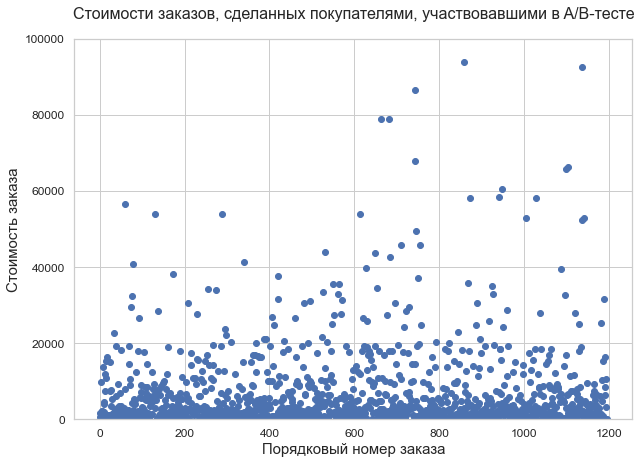

In [42]:
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize=(10,7))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимоcти заказов, сделанных покупателями, участвовавшими в A/B-тесте', fontsize=16, pad=20)
plt.xlabel('Порядковый номер заказа', fontsize=15)
plt.ylabel('Стоимость заказа', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100000) #меняем масштаб
plt.show()

**По графику видно, что основная масса заказов имеет стоимость не более 20 тыс. Чтобы оценить границу, по которой будем отсеивать аномально дорогие заказы, рассчитаем перцентили.**

#### Расчет 95-го и 99-го перцентилей стоимости заказов

In [43]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**95% заказов не дороже 28 тыс, 99% заказов - не дороже 58 тыс. Выберем в качестве границы, от которой начинается аномально дорогой заказ - 40 тыс. Таким образом будет отсеяно от 1 до 5% зааказов по критерию аномально высокой стоимости.** 

### Статистический анализ данных
<a id='stats'></a>

#### Оценка статистической значимости различий среднего количества заказов на посетителя между группами по «сырым» данным

**Чтобы оценить различия в среднем количестве заказов на посетителя необходимо сформировать два датафрейма (для групп А и B), в которые войдут данные о количестве заказов, сделанных покупателями, + нули для посетителей, которые не делали заказов. Назовем эти датафреймы `sample_orders_a` и `sample_orders_b`:**

In [44]:
# отбираем данные о заказах для группы А:
orders_a = orders.query('group == "A"') 
# cчитаем число заказов на каждого покупателя в группе А:
num_of_orders_a = orders_a.pivot_table(index='visitorId', values='transactionId', aggfunc='count').reset_index()
num_of_orders_a.columns = ['visitorId', 'num_of_orders']
#считаем разницу между общим числом посетителей в группе А за все время и числом покупателей в группе А за все время:
num_of_zeros_a = visitors.query('group == "A"')['visitors'].sum() - len(num_of_orders_a)
# формируем sample_orders_a:
sample_orders_a = pd.concat([num_of_orders_a['num_of_orders'], pd.Series(0,index=np.arange(num_of_zeros_a), name='num_of_orders')], axis=0)
# посчитаем среднее число заказов на посетителя для самопроверки:
print('Среднее число заказов на посетителя в группе А (расчет по сформированной выборке)', round(sample_orders_a.mean(),4))

Среднее число заказов на посетителя в группе А (расчет по сформированной выборке) 0.0297


**Полученное число должно совпадать со значением кумулятивного среднего количества заказов на посетителя в последний день проведения теста. Проверим, так ли это:**

In [45]:
print('Среднее число заказов на посетителя в группе А (расчет по кумулятивному среднему)', round(cum_avg_orders_a.loc[30,'cum_avg_orders'],4))

Среднее число заказов на посетителя в группе А (расчет по кумулятивному среднему) 0.0297


**Совпадает! Значит, `sample_orders_a` составлен правильно. Теперь сформируеи `sample_orders_b`:**

In [46]:
# отбираем данные о заказах для группы B:
orders_b = orders.query('group == "B"') 
# cчитаем число заказов на каждого покупателя в группе B:
num_of_orders_b = orders_b.pivot_table(index='visitorId', values='transactionId', aggfunc='count').reset_index()
num_of_orders_b.columns = ['visitorId', 'num_of_orders']
#считаем разницу между общим числом посетителей в группе B за все время и числом покупателей в группе B за все время:
num_of_zeros_b = visitors.query('group == "B"')['visitors'].sum() - len(num_of_orders_b)
# формируем sample_orders_a:
sample_orders_b = pd.concat([num_of_orders_b['num_of_orders'], pd.Series(0,index=np.arange(num_of_zeros_b), name='num_of_orders')], axis=0)
# посчитаем среднее число заказов на посетителя для самопроверки:
print('Среднее число заказов на посетителя в группе B (расчет по сформированной выборке)',round(sample_orders_b.mean(), 4))

Среднее число заказов на посетителя в группе B (расчет по сформированной выборке) 0.0338


**Также проверим, совпадает ли полученное среднее значение числа заказов на посетителя с соответствующим кумулятивным значением в последний день теста:**

In [47]:
print('Среднее число заказов на посетителя в группе B (расчет по кумулятивному среднему)',round(cum_avg_orders_b.loc[30,'cum_avg_orders'], 4))

Среднее число заказов на посетителя в группе B (расчет по кумулятивному среднему) 0.0338


**Тоже совпадает. Значит, оба сэмпла сформированы правильно и можно проверять гипотезу о наличии значимых различий между средним числом заказов на посетителя в группах A и B:**

In [48]:
print('p-value')
print("{0:.4f}".format(stats.mannwhitneyu(sample_orders_a, sample_orders_b)[1]))

p-value
0.0168


**Полученное значение p-value < 0.05 - различия среднего числа заказов между группами А и B по "сырым" данным статистически значимы.**

#### Оценка статистической значимости различий среднего количества заказов на посетителя между группами по «очищенным» данным

**Отфильтруем датафрейм `orders` по критериям отсечения аномально дорогих заказов и аномально часто заказывающих пользователей - уберем заказы стоимостью свыше 40000, а также заказы тех пользователей, которые сделали четыре и более заказов. Сначал получим список id таких пользователей. Для этого обратимся к сформированному нами ранее датафрейму `orders_per_customer` и найдем все пользователей, которые сделали более 3 заказов:**

In [49]:
orders_per_customer = orders_per_customer.sort_values(by='num_of_orders', ascending=False).reset_index()

In [50]:
abnormal_customers = orders_per_customer.query('num_of_orders > 3').reset_index()
abnormal_customers = abnormal_customers['visitorId']
abnormal_customers

0     4256040402
1     2458001652
2     2378935119
3     2038680547
4      199603092
5     3062433592
6      237748145
7     3803269165
8     1230306981
9     3717692402
10    1614305549
11     457167155
12    2587333274
Name: visitorId, dtype: int64

**Теперь сформируем "очищенный" датафрейм `orders_filtered` в котором будут только заказы стоимостью не более 40000 и заказы тех пользователей, которые покупали не более трех раз:**

In [51]:
orders_filtered = orders.query('visitorId not in @abnormal_customers and revenue <= 40000')
orders_filtered

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


In [52]:
print(orders_filtered.shape)
print(orders.shape)

(1090, 5)
(1197, 5)


**Исходный датафрейм уменьшился на 107 заказов, т.е. примерно на 10%** 

**Теперь соберем два датафрейма (`orders_filtered_a`, `orders_filtered_b`), в которых будут данные о количестве заказов на пользователя по отфильтрованным данным с учетом тех, кто не заказывал:**

In [53]:
# отбираем данные о заказах для группы А:
orders_filtered_a = orders_filtered.query('group == "A"') 
# cчитаем число заказов на каждого покупателя в группе А:
num_of_orders_filtered_a = orders_filtered_a.pivot_table(index='visitorId', values='transactionId', aggfunc='count').reset_index()
num_of_orders_filtered_a.columns = ['visitorId', 'num_of_orders']
#считаем разницу между общим числом посетителей в группе А за все время и числом покупателей в группе А за все время:
num_of_zeros_a = visitors.query('group == "A"')['visitors'].sum() - len(num_of_orders_a)
# формируем sample_orders_filtered_a:
sample_orders_filtered_a = pd.concat([num_of_orders_filtered_a['num_of_orders'], pd.Series(0,index=np.arange(num_of_zeros_a), name='num_of_orders')], axis=0)
# посчитаем среднее число заказов на посетителя по очищенным данным:**
sample_orders_filtered_a.mean()

0.02677998717126363

In [54]:
# отбираем данные о заказах для группы B:
orders_filtered_b = orders_filtered.query('group == "B"') 
# cчитаем число заказов на каждого покупателя в группе B:
num_of_orders_filtered_b = orders_filtered_b.pivot_table(index='visitorId', values='transactionId', aggfunc='count').reset_index()
num_of_orders_filtered_b.columns = ['visitorId', 'num_of_orders']
#считаем разницу между общим числом посетителей в группе А за все время и числом покупателей в группе B за все время:
num_of_zeros_b = visitors.query('group == "B"')['visitors'].sum() - len(num_of_orders_b)
# формируем sample_orders_filtered_b:
sample_orders_filtered_b = pd.concat([num_of_orders_filtered_b['num_of_orders'], pd.Series(0,index=np.arange(num_of_zeros_b), name='num_of_orders')], axis=0)
# посчитаем среднее число заказов на посетителя по очищенным данным:**
sample_orders_filtered_b.mean()

0.03117556767056582

**По очищенным данным: в группе А среднее число заказов на посетителя 0.0268, в группе B - 0.0312. Оба средних значения стали ниже чем средние по неочищенным данным (0.0297 и 0.0338). Проверим, есть ли между ними статистически значимая разница:**

In [55]:
print("{0:.4f}".format(stats.mannwhitneyu(sample_orders_filtered_a, sample_orders_filtered_b)[1]))

0.0091


**Значение p-value для "очищенных" данных < 0.01. Различия статистически значимы, как и в случае "неочищенных" данных, а p-value даже ниже, чем для "неочищенных" данных (0.0091 < 0.0168). Это значит, что в достоверности различий среднего количества заказов на посетителя между группами А и B по "очищенным" данным мы можем быть более уверены**

#### Оценка статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

**Сравним группы A и B по среднему чеку:** 

In [67]:
print('p-value')
print("{0:.4f}".format(stats.mannwhitneyu(orders[orders['group']=="A"]['revenue'], orders[orders['group']=="B"]['revenue'])[1]))

p-value
0.7293


**p-value > 0.05, поэтому делаем вывод, что статистически значимых различий чека в группах А и B по "сырым" данным нет. Посмотрим на статистическое описание обеих выборок при помощи метода `describe` и оценим как распределены значения выручки с одного заказа в группах А и B:**

In [57]:
orders[orders['group']=="A"]['revenue'].describe()

count      557.000000
mean      7333.578097
std      11847.549587
min         50.000000
25%       1188.000000
50%       3000.000000
75%       8280.000000
max      93940.000000
Name: revenue, dtype: float64

In [58]:
orders[orders['group']=="B"]['revenue'].describe()

count    6.400000e+02
mean     9.230875e+03
std      5.244977e+04
min      5.000000e+01
25%      1.312500e+03
50%      2.965000e+03
75%      8.355250e+03
max      1.294500e+06
Name: revenue, dtype: float64

**Средние значения чеков различаются очень сильно (7333.58 в группе А и 9230.88 в группе B). Однако, во-первых, оба распределения асимметричны и лучше характеризовать выборки не средними, а медианными значениями. Медианы чеков в группах очень близки и составляют 3000 и 2965, соответственно, что хорошо согласуется с результатами стат. теста. Во-вторых, в группе B максимальное значение чека составляет почти 1.3 млн, тогда как в группе А только 94 тыс. Такой сильный статистический выброс искажает средние данные и делает их нерепрезентативными.**

#### Оценка статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

**Теперь проверим, как повлияло избавление от аномальных заказов на различия в среднем чеке между группами. Сначала рассчитаем оба средних значения чека по отфильтрованным данным:**

In [64]:
print("Средний чек в группе А по очищенным данным")
round(orders_filtered[orders_filtered['group']=="A"]['revenue'].mean())

Средний чек в группе А по очищенным данным


5783

In [65]:
print("Средний чек в группе B по очищенным данным")
round(orders_filtered[orders_filtered['group']=="B"]['revenue'].mean())

Средний чек в группе B по очищенным данным


6061

**Абсолютное различие между средними чеками в группах А и B по очищенным данным стало меньше, чем было по "сырым" данным (было 7334 в группе А и 9231 в группе B, стало 5783 в группе А и 6061 в группе B). Вместе с тем, статистический тест, выполненный ранее по "сырым" данным не показал достоверных различий в среднем чеке между группами (p=0.7293). Посмотрим, что получится для "очищенных" данных:**

In [61]:
print("{0:.4f}".format(stats.mannwhitneyu(orders_filtered[orders_filtered['group']=="A"]['revenue'], orders_filtered[orders_filtered['group']=="B"]['revenue'])[1]))

0.9067


**p > 0.05 - достоверных различий в среднем чеке между группами A и B по "очищенным" данным тоже нет. Значение p-value даже увеличилось по сравнению с расчетом по "сырым" данным, что еще больше подкрепляет нашу уверенность в отстутствии различий среднего чека между группами А и B.**

## Результаты А/B-теста и выводы по ним
<a id='conclusions'></a>

**А/B-тест проводился в период с 1 августа 2019 года по 31 августа 2019 года. В группах трафика А и B было 18736 и 18916 пользователей, различие в численности пользователей в группах - менее 1%**

**Анализ среднего чека и количества покупок на одного пользователя в группах по исходным данным выявил, что:**

1. Пользователи группы B совершают заказы достоверно чаще (p<0.05), чем пользователи группы А (0.0338 и 0.0297 заказов на пользователя, соответственно), что составляет около 12% различия в частоте заказов.
2. Средние чеки заказов в группах достоверно не различаются, несмотря на выраженную абсолютную разницу средних величин чека (7334 и 9231), вызванную наличием в группе B заказов с аномально высокой стоимостью.

**Исключение из выборки аномально дорогих заказов (свыше 40000), а также заказов тех пользователей, которые совершили аномально большое число покупок (4 и более) позволило сделать следующие выводы:**

1. Пользователи группы B совершают заказы достоверно чаще (p<0.01) чем пользователи группы А (0.0312 и 0.0268 заказов на пользователя, соответственно), что составляет около 14% различия в частоте заказов.

2. Средние чеки в группах A и B достоверно не различаются (p=0.9067) и составляют 5783 и 6061.

**Полученный результат позволяет признать проведенный A/B-тест успешным. При равных величинах среднего чека и на 14% более высокой конверсии в группе B из посетитителя в покупателя по сравнению с группой А, можно ожидать увеличения выручки на 14%. Таким образом, мы отдаем "победу" в A/B-тесте группе B.**